# Example 3. Respiration mean wave

Compute the mean wave of a respiration

In [1]:
%pylab inline
import novainstrumentation as ni
import seaborn

Populating the interactive namespace from numpy and matplotlib


## 1. Load data and plot 

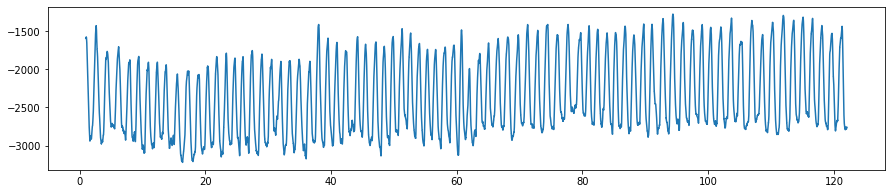

In [4]:
figure(figsize=(15,3))
d = loadtxt('../data/resp_simple_breath.txt')
t=d[:,0]/1000.
s=d[:,1]*-1
plot(t,s)

## 2. Clean and ressample
Execute: 
* a) smooth the signal and normalize
* b) ressample the signal



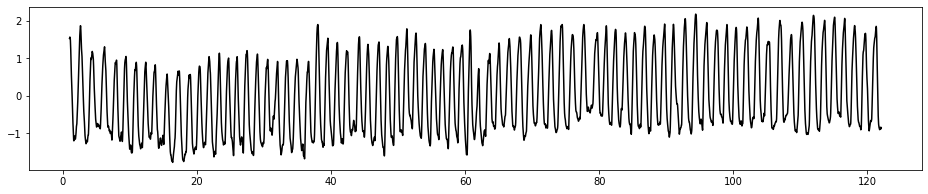

In [5]:
def normalize(s):
    return (s-mean(s))/std(s)

s_ = ni.smooth(s,10) 
s_ = s_[::10]
t_ = t[::10]
s_ = normalize(s_)

figure(figsize=(16,3))
plot(t_, s_,'k')

## 3. Extract all respiration cycles:

* a) Select and example of a respiration cycle (try 4140:4310)
* b) Use ni.sumvolve on the full signal and the respiration example
* c) Detect the position of each aligment


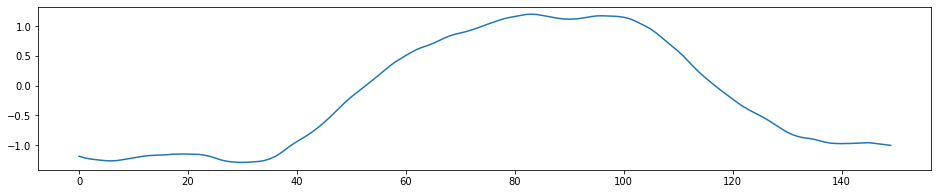

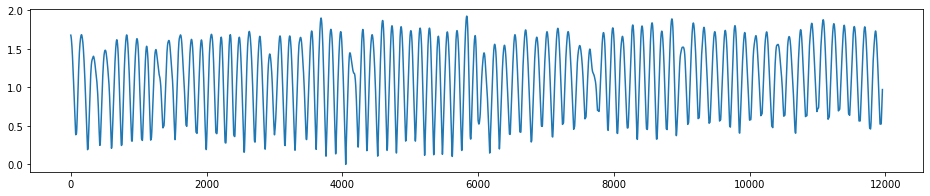

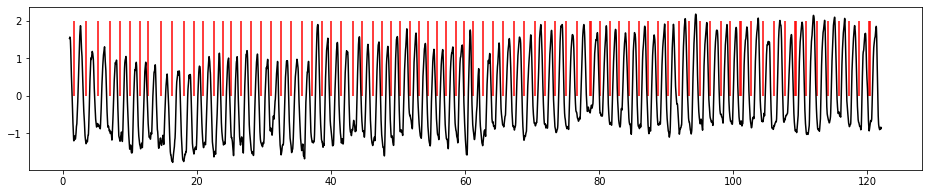

In [11]:
figure(figsize=(16,3))
plot(s_[4050:4050+150])

figure(figsize=(16,3))
w = s_[4050:4050+150]
plot(ni.sumvolve(s_,w))

#p = ni.peaks(ni.sumvolve(s_,w),1)

p = ni.peaks(-ni.sumvolve(s_,w),-1)
#vlines(p, -1, 1)

figure(figsize=(16,3))
plot( t_,s_,'k')
vlines(t_[p],0,2,'r')


## 4. Plot each respiration example

Cycle each of the detected examples and plot

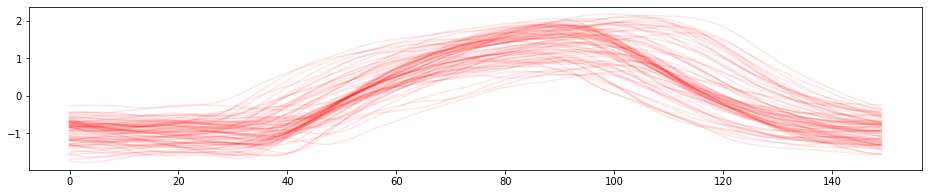

In [23]:

lw = 150
figure(figsize=(16,3))

for ip in p:
    plot(s_[ip:ip+lw],'r',alpha=.1)

## 5. Extract mean wave 
Plot the mean wave with plus and minus the std

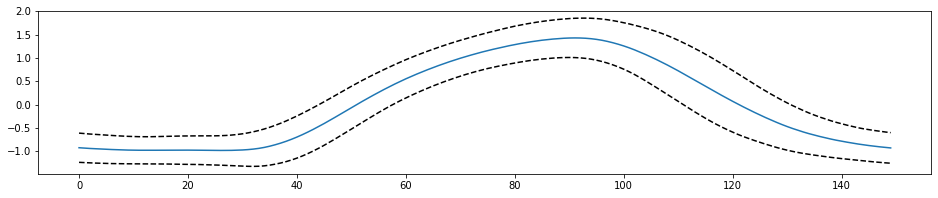

In [25]:
all_waves = zeros((lw,len(p)))

for ix, ip in enumerate(p):

    all_waves[:,ix] = s_[ip:ip+lw].T

figure(figsize=(16,3))

mw = mean(all_waves,1)
sw = std(all_waves,1)

plot(mw)
plot(mw+sw,'k--')
plot(mw-sw,'k--')

In [14]:
ix

0